<a href="https://colab.research.google.com/github/laasyagudisa/ML_Assignments_Data/blob/main/LinearRegression_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import SGDRegressor



In [2]:
mydata = pd.read_csv('https://raw.githubusercontent.com/laasyagudisa/ML_Regression/main/student-mat.csv',sep=';')

In [3]:
display(mydata)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
# Clean the data from null values and redundant columns
mydata = mydata.dropna()

In [5]:
mydata = mydata.drop_duplicates()

In [6]:
# Convert categorical data to numerical
label_encoder = LabelEncoder()

In [7]:
for column in mydata.columns:
    if mydata[column].dtype == 'object':
        mydata[column] = label_encoder.fit_transform(mydata[column])



In [8]:
# Target
Y = mydata['G3']

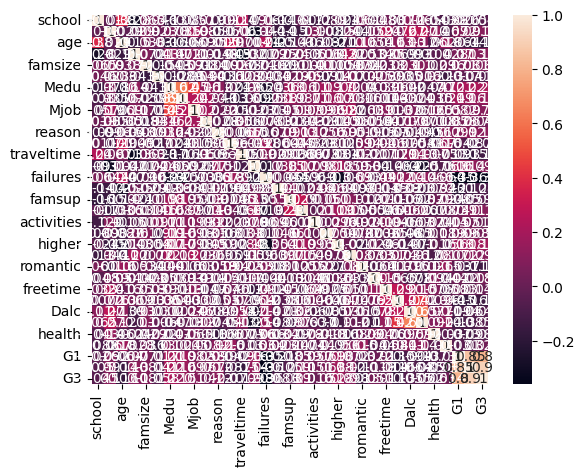

In [9]:
# Calculate the correlation matrix
corr_matrix = mydata.corr()

# Visualize the correlation matrix using a heatmap (optional)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True)
plt.show()


In [10]:
# Check for constant columns
constant_columns = [col for col in mydata.columns if mydata[col].nunique() == 1]

# Remove constant columns
mydata = mydata.drop(columns=constant_columns)


In [11]:
display(corr_matrix)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,...,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,...,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,...,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,...,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,...,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,...,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,...,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.008196,0.057661,0.067006,0.042286


In [12]:
 # Obtained correlation values for the target, to identify which are closely correlated to the target
interestedCorrValues = corr_matrix['G3']

In [13]:
display(interestedCorrValues)

school       -0.045017
sex           0.103456
age          -0.161579
address       0.105756
famsize       0.081407
Pstatus      -0.058009
Medu          0.217147
Fedu          0.152457
Mjob          0.102082
Fjob          0.042286
reason        0.121994
guardian     -0.070109
traveltime   -0.117142
studytime     0.097820
failures     -0.360415
schoolsup    -0.082788
famsup       -0.039157
paid          0.101996
activities    0.016100
nursery       0.051568
higher        0.182465
internet      0.098483
romantic     -0.129970
famrel        0.051363
freetime      0.011307
goout        -0.132791
Dalc         -0.054660
Walc         -0.051939
health       -0.061335
absences      0.034247
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [14]:

import numpy as np

interestedFeatures = np.logical_and(interestedCorrValues > 0, interestedCorrValues < .05)


In [15]:
print(interestedFeatures)

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob           True
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities     True
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime       True
goout         False
Dalc          False
Walc          False
health        False
absences       True
G1            False
G2            False
G3            False
Name: G3, dtype: bool


In [16]:
# Chosen features
filtered_values = interestedCorrValues[interestedFeatures]

print(filtered_values)

Fjob          0.042286
activities    0.016100
freetime      0.011307
absences      0.034247
Name: G3, dtype: float64


In [17]:
X = mydata[['Fjob','activities','freetime','absences']]

In [18]:
display(X)

,Fjob,activities,freetime,absences
0,4,0,3,6
1,2,0,3,4
2,2,0,3,10
3,3,1,2,2
4,2,0,3,4
...,...,...,...,...
390,3,0,5,11
391,3,0,4,3
392,2,0,5,3
393,2,0,4,0


In [19]:
features = ['Fjob','activities','freetime','absences']

In [20]:
# Seperate Data into training and testsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [21]:
learn_rate = [0.001,0.01,0.03]
iteration = [5000,10000]
tolerance = [1e-5,1e-6,1e-7]


#dataframe to record the trials
df = pd.DataFrame(columns=['Learning Rate', 'Tolerance', 'Iterations'])
results_df = pd.DataFrame(columns=['Learning Rate', 'Tolerance', 'Iterations','Train MSE','Train R2', 'Test MSE', 'Test R2'])

# Iterate through different parameters to find the MSE for all combinations of parameters
for lr in learn_rate:
  for tol in tolerance:
    for iter in iteration:
      model = SGDRegressor(alpha=lr, eta0=0.001, max_iter = iter, tol = tol)
      model.fit(X_train, Y_train)
      Y_pred = model.predict(X_test)
      Y_train_predict = model.predict(X_train)
      r2a = r2_score(Y_train, Y_train_predict)
      mse1 = mean_squared_error(Y_train, Y_train_predict)
      mse2 = mean_squared_error(Y_test, Y_pred)
      r2b = r2_score(Y_test, Y_pred)
      results_df = pd.concat([results_df, pd.DataFrame({
        'Learning Rate': [lr],
        'Tolerance': [tol],
        'Iterations': [iter],
        'Train MSE': [mse1],
        'Train R2': [r2a],
        'Test MSE':[mse2],
        'Test R2' : [r2b]})], ignore_index=True)

In [22]:
print(results_df)

    Learning Rate     Tolerance Iterations  Train MSE  Train R2   Test MSE  \
0           0.001  1.000000e-05       5000  25.300799 -0.204541  20.969400   
1           0.001  1.000000e-05      10000  24.950390 -0.187858  21.326244   
2           0.001  1.000000e-06       5000  25.234104 -0.201366  21.188339   
3           0.001  1.000000e-06      10000  25.441832 -0.211255  21.645849   
4           0.001  1.000000e-07       5000  25.551299 -0.216467  21.091617   
5           0.001  1.000000e-07      10000  25.021407 -0.191239  21.301612   
6           0.010  1.000000e-05       5000  25.182332 -0.198901  21.432518   
7           0.010  1.000000e-05      10000  25.298428 -0.204428  21.360235   
8           0.010  1.000000e-06       5000  25.336684 -0.206249  21.035939   
9           0.010  1.000000e-06      10000  25.383938 -0.208499  21.110217   
10          0.010  1.000000e-07       5000  25.117013 -0.195791  21.007630   
11          0.010  1.000000e-07      10000  25.291550 -0.204101 

In [23]:
model = SGDRegressor(alpha=.001, eta0=0.001, max_iter = 10000, tol = 1e-7)
model.fit(X_train, Y_train)

SGDRegressor(alpha=0.001, eta0=0.001, max_iter=10000, tol=1e-07)

In [24]:
# From Scikit-learn used the library to predict Y using the test data
Y_pred = model.predict(X_test)

In [25]:
# Used functions from Scikit-learn to get the mean square error and R square of the predicted Y
mse2 = mean_squared_error(Y_test, Y_pred)

In [26]:
print(f'Mean Squared Error (MSE): {mse2}')

Mean Squared Error (MSE): 21.38002787723818


In [27]:
r2b = r2_score(Y_test, Y_pred)

In [28]:
print(f'R-squared (R2 score): {r2b}')

R-squared (R2 score): -0.04267147486827949


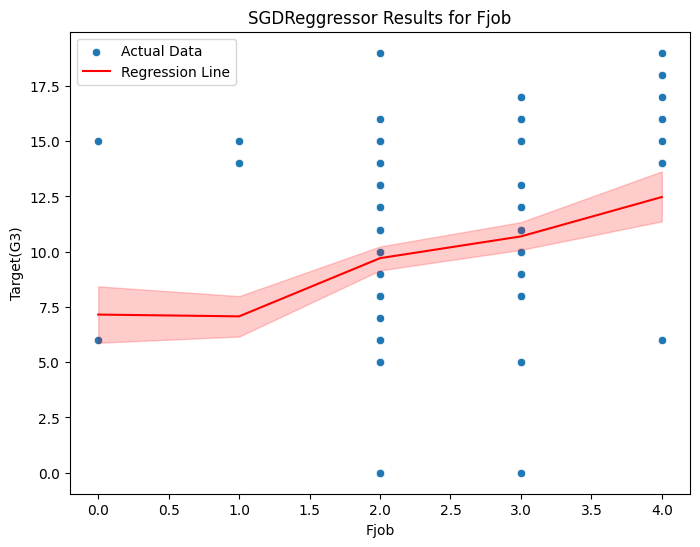

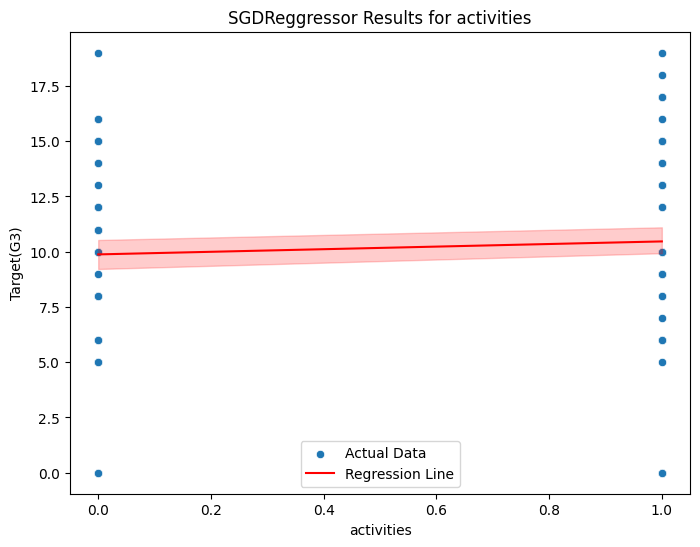

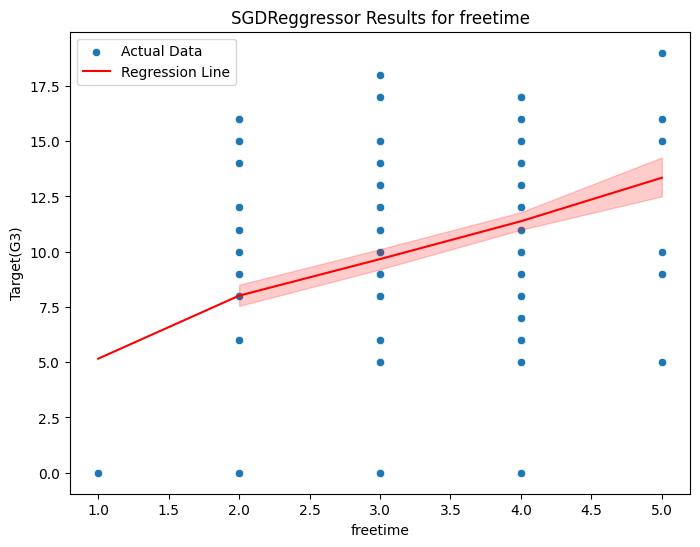

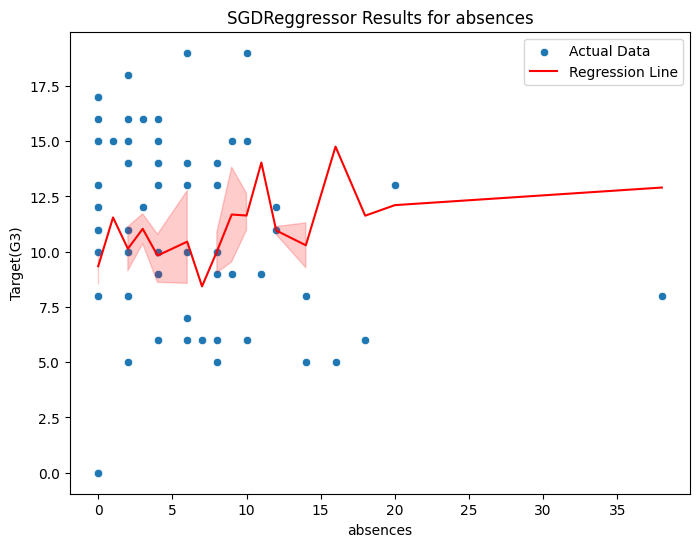

In [29]:
# Graph of the feature correlation against actual Y
for feature in X:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_test[feature], y=Y_test, label='Actual Data')
    sns.lineplot(x=X_test[feature], y=Y_pred, color='red', label='Regression Line')

    plt.xlabel(feature)
    plt.ylabel('Target(G3)')
    plt.title(f'SGDReggressor Results for {feature}')
    plt.legend()
    plt.show()

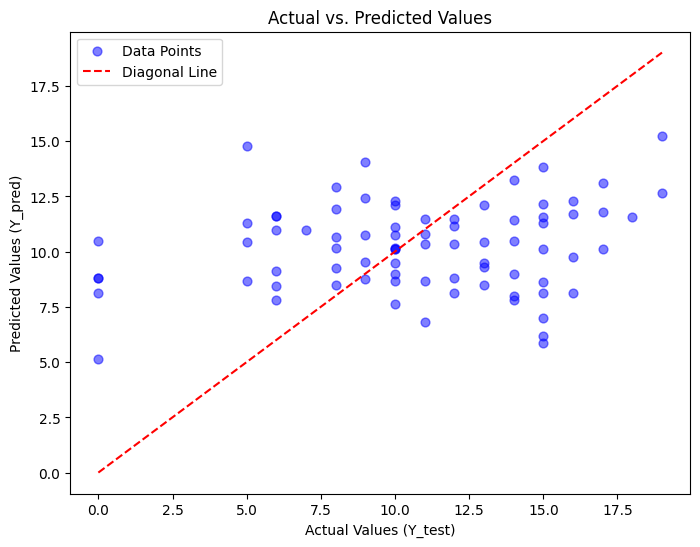

In [30]:


# Create a scatterplot to compare actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5, color= 'blue', s=40, label='Data Points')  # Adjust alpha and s


plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Diagonal Line')

plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='upper left')
plt.show()


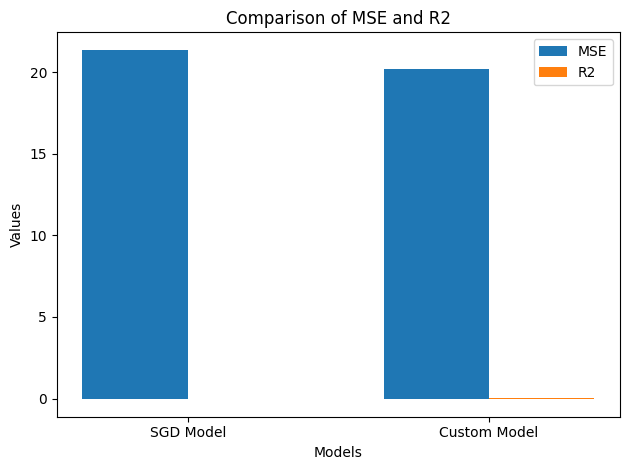

In [31]:
#graph of the results of the package SGDRegressor modeland the custom model mse
import matplotlib.pyplot as plt
import numpy as np


mse_sgd = mse2
r2_sgd = r2b

mse_custom = 20.1927583610485
r2_custom = 0.015229855505081824

# Labels for the models
models = ['SGD Model', 'Custom Model']

# MSE values for both models
mse_values = [mse_sgd, mse_custom]

# R2 values for both models
r2_values = [r2_sgd, r2_custom]

# Set the width of the bars
bar_width = 0.35

# Create positions for bars on the x-axis
x = np.arange(len(models))

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot MSE values
mse_bars = ax.bar(x - bar_width/2, mse_values, bar_width, label='MSE')

# Plot R2 values
r2_bars = ax.bar(x + bar_width/2, r2_values, bar_width, label='R2')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Comparison of MSE and R2')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
